In [1]:
#Data Loading and Exploration.
import pandas as pd
df = pd.read_csv('house_price_data.csv')

print("Dataset Shape : ", df.shape) #prints dataset shape.
print("Datatypes: ", df.dtypes) #prints the datatypes of each column.

print("Missing Values: ", df.isnull().sum()) #prints the number of missing values in each column.
df.dropna(inplace = True) # removes the missinng values from each row.

print("Summary Statistics: ", df.describe()) #prints the summary statistics like Count(number of missing values), mean, standard deviation and all of integer or float datatypes.


Dataset Shape :  (8000, 25)
Datatypes:  property_id                 object
neighborhood                object
distance_to_city_center    float64
distance_to_metro            int64
distance_to_school           int64
crime_rate                 float64
house_age                    int64
total_area                   int64
bedrooms                     int64
bathrooms                    int64
floors                       int64
garage                       int64
garden                       int64
basement                     int64
balcony                      int64
construction_quality        object
renovation_status           object
heating_type                object
air_conditioning             int64
parking_spaces               int64
energy_efficiency           object
listing_duration             int64
season_sold                 object
year_sold                    int64
sale_price                 float64
dtype: object
Missing Values:  property_id                0
neighborhood             

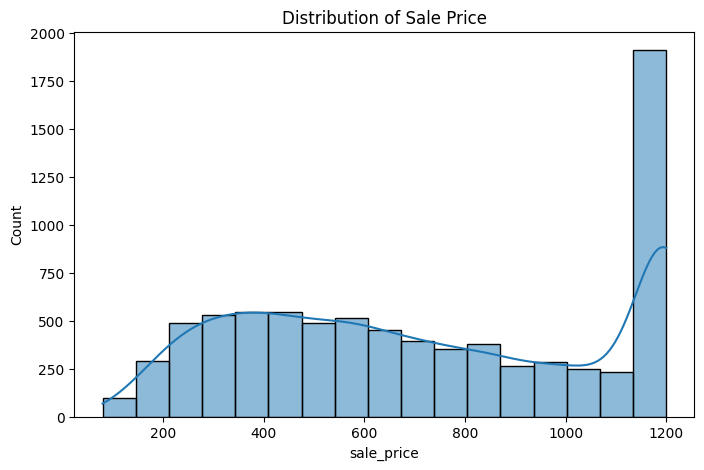

Skewness: 0.07300029773629817


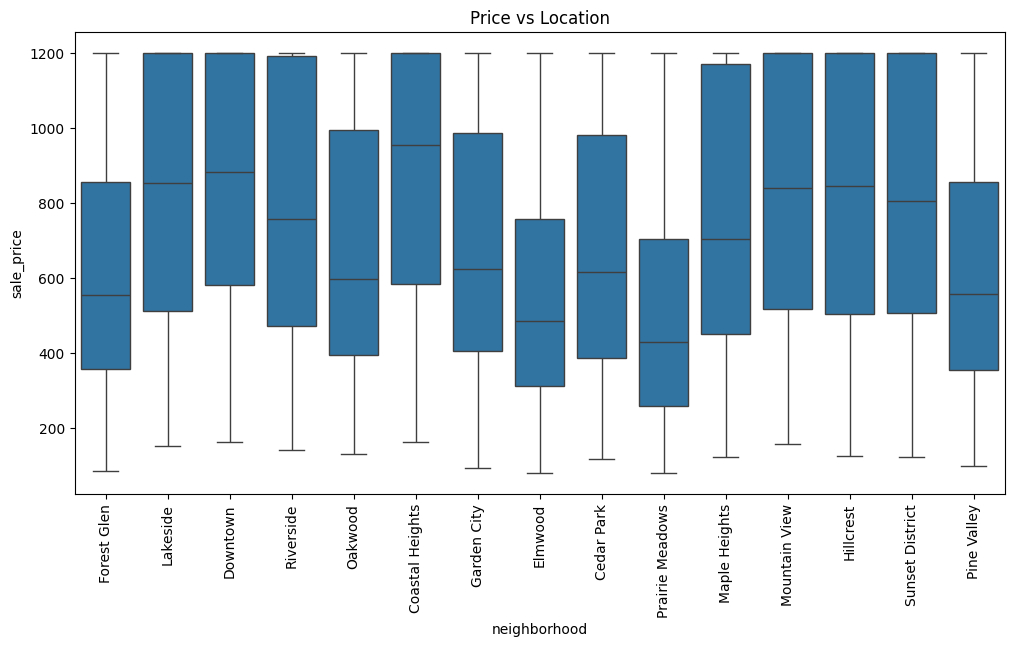

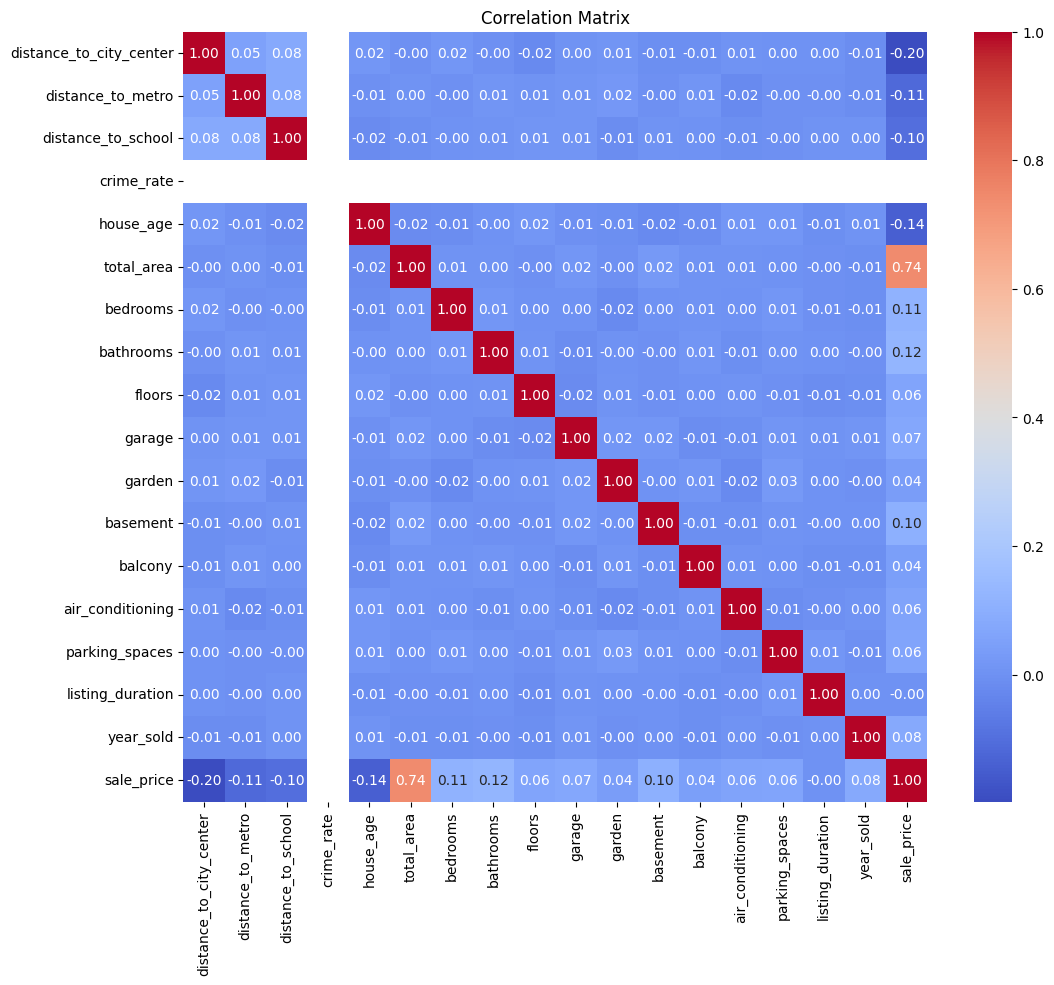

                   features           VIF
0   distance_to_city_center  1.010655e+00
1         distance_to_metro  1.009969e+00
2        distance_to_school  1.013575e+00
3                crime_rate  3.603081e+06
4                 house_age  1.002711e+00
5                total_area  1.001521e+00
6                  bedrooms  1.001525e+00
7                 bathrooms  1.000733e+00
8                    floors  1.001638e+00
9                    garage  1.002032e+00
10                   garden  1.002940e+00
11                 basement  1.001659e+00
12                  balcony  1.001198e+00
13         air_conditioning  1.001760e+00
14           parking_spaces  1.001776e+00
15         listing_duration  1.000681e+00
16                year_sold  1.000876e+00


In [2]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Price Distribution
plt.figure(figsize = (8, 5))
sns.histplot(df['sale_price'], kde=True)
plt.title('Distribution of Sale Price')
plt.show()

print("Skewness:", df['sale_price'].skew()) # prints the skewness

# Price vs Location
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'neighborhood', y = 'sale_price', data = df)
plt.xticks(rotation = 90)
plt.title('Price vs Location')
plt.show()

# Correlation Heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Multicollinearity
numeric_df = df.select_dtypes(include = ['float64', 'int64']).drop(columns = ['sale_price']).dropna() # selects the numerical columns only.
vif_df = pd.DataFrame() # vif stands for variance_inflation_factor.
vif_df['features'] = numeric_df.columns
vif_values = []
for i in range(numeric_df.shape[1]):
    vif = variance_inflation_factor(numeric_df.values, i)
    vif_values.append(vif)

vif_df = pd.DataFrame({
    'features': numeric_df.columns,
    'VIF': vif_values
})

print(vif_df)

In [3]:
# Feature Engineering and PreProcessing
# Handling Categorical Values
df = pd.get_dummies(df, drop_first=True)

# Handling Outliers For sale_price
for col in ['sale_price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

X = df.drop('sale_price', axis=1) # removes sale_price from Dataframe.
y = df['sale_price']

# Spliting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Numerical Values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(6400, 8045)
0
0


In [4]:
# Model Development
from sklearn.linear_model import LinearRegression

# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)


LinearRegression()

MAE :  185.61448035098195
MSE :  45808.82744701647
RMSE :  214.02996857219895
R2 :  0.62388561622364


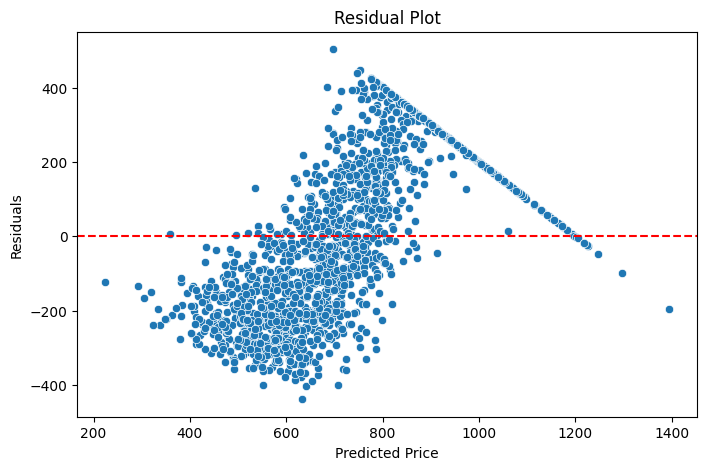

In [7]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = linear_regression.predict(X_test_scaled)

# Evaluation of Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE : ", mae)
print("MSE : ", mse)
print("RMSE : ", rmse)
print("R2 : ", r2)

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize = (8, 5))
sns.scatterplot(x = y_pred, y = residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
